# K-Means Clustering algorithm

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


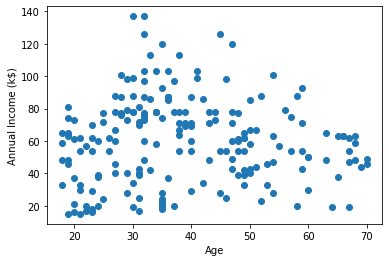

In [3]:
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

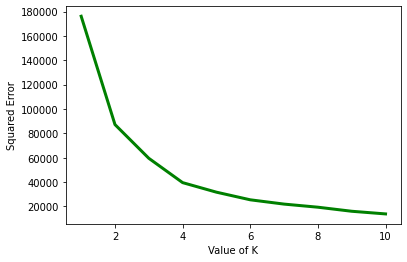

In [4]:
error =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(df[['Age', 'Annual Income (k$)']])
    error.append(KM.inertia_)    
 
plt.plot(range(1, 11), error, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error")
plt.show()

In [5]:
KM = KMeans(n_clusters=4)
y_predicted = KM.fit_predict(df[['Age', 'Annual Income (k$)']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [6]:
df['Cluster'] = y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


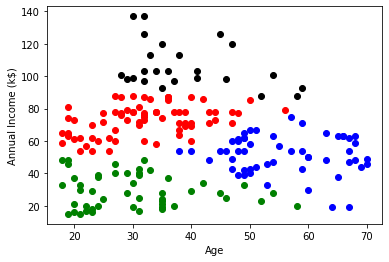

In [7]:
cluster1 = df[df.Cluster==0]
cluster2 = df[df.Cluster==1]
cluster3 = df[df.Cluster==2]
cluster4 = df[df.Cluster==3]

plt.scatter(cluster1['Age'], cluster1['Annual Income (k$)'], color='red')
plt.scatter(cluster2['Age'], cluster2['Annual Income (k$)'], color='blue')
plt.scatter(cluster3['Age'], cluster3['Annual Income (k$)'], color='green')
plt.scatter(cluster4['Age'], cluster4['Annual Income (k$)'], color='black')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

## Normalizing the columns' values

In [8]:
df['Age'] = (df['Age']-df['Age'].min())/(df['Age'].max()-df['Age'].min())
df['Annual Income (k$)'] = (df['Annual Income (k$)']-df['Annual Income (k$)'].min())/(df['Annual Income (k$)'].max()-df['Annual Income (k$)'].min())
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,0.019231,0.000000,39,2
1,2,Male,0.057692,0.000000,81,2
2,3,Female,0.038462,0.008197,6,2
3,4,Female,0.096154,0.008197,77,2
4,5,Female,0.250000,0.016393,40,2


In [9]:
KM = KMeans(n_clusters=4)
y_predicted = KM.fit_predict(df[['Age', 'Annual Income (k$)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 1, 3, 3, 3, 3, 3, 2, 3, 0, 2, 3, 3, 0, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 0, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 0, 2, 2, 2, 3, 3, 3, 3, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

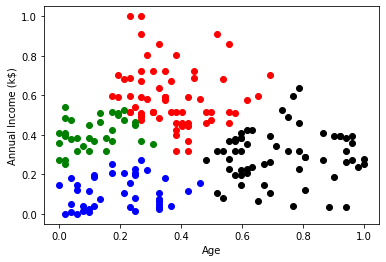

In [10]:
df['Cluster'] = y_predicted

cluster1 = df[df.Cluster==0]
cluster2 = df[df.Cluster==1]
cluster3 = df[df.Cluster==2]
cluster4 = df[df.Cluster==3]

plt.scatter(cluster1['Age'], cluster1['Annual Income (k$)'], color='red')
plt.scatter(cluster2['Age'], cluster2['Annual Income (k$)'], color='blue')
plt.scatter(cluster3['Age'], cluster3['Annual Income (k$)'], color='green')
plt.scatter(cluster4['Age'], cluster4['Annual Income (k$)'], color='black')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()